
# Project: Investigate a Dataset (No-show Appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


I have selected Noshowappointments dataset since I find it more interesting and related to my major.

The dependant variable is No-show, the rest is the independent varaible.

In [112]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
%matplotlib inline

The questions are:
1- Does age affect not showing up at the appointments?
2- Does sending SMS affects not showing up at the appointments?
3- What is the relation between people with chronic diseases and not showing up at the appoinments?
4- Does gender affect not showing up at the appointments?

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [113]:
df = pd.read_csv('noshowappointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [114]:
df.shape

(110527, 14)

In [115]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


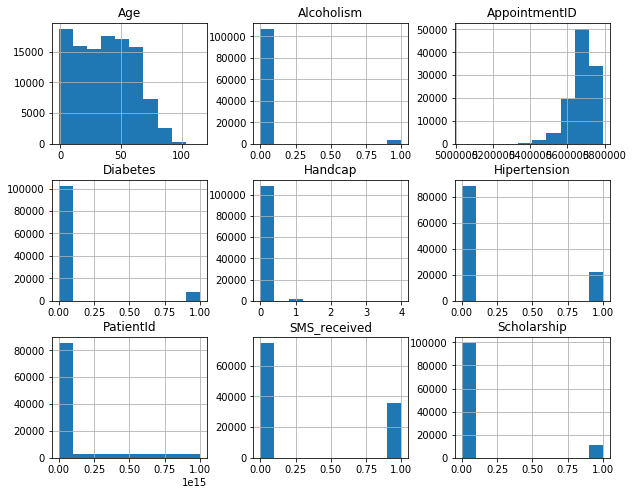

In [117]:
df.hist(figsize=(10,8));

In [118]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No



### Data Cleaning (Remove useless columns and rows with wrong values)

We drop PatientId, AppointmentID, and Neighbourhood since they do not affect the analysis and useless.

In [119]:
df.drop(['PatientId','AppointmentID','Neighbourhood'], axis=1, inplace=True)

We remove the rows with age=-1, since it not possible!

In [120]:
df = df[df.Age != -1]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 11 columns):
Gender            110526 non-null object
ScheduledDay      110526 non-null object
AppointmentDay    110526 non-null object
Age               110526 non-null int64
Scholarship       110526 non-null int64
Hipertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handcap           110526 non-null int64
SMS_received      110526 non-null int64
No-show           110526 non-null object
dtypes: int64(7), object(4)
memory usage: 10.1+ MB


We remove the rows with Handcap > 1 , since it is binary which means 0 or 1!

In [121]:
df = df[df.Handcap != 2]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110343 entries, 0 to 110526
Data columns (total 11 columns):
Gender            110343 non-null object
ScheduledDay      110343 non-null object
AppointmentDay    110343 non-null object
Age               110343 non-null int64
Scholarship       110343 non-null int64
Hipertension      110343 non-null int64
Diabetes          110343 non-null int64
Alcoholism        110343 non-null int64
Handcap           110343 non-null int64
SMS_received      110343 non-null int64
No-show           110343 non-null object
dtypes: int64(7), object(4)
memory usage: 10.1+ MB


In [122]:
df = df[df.Handcap != 3]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110330 entries, 0 to 110526
Data columns (total 11 columns):
Gender            110330 non-null object
ScheduledDay      110330 non-null object
AppointmentDay    110330 non-null object
Age               110330 non-null int64
Scholarship       110330 non-null int64
Hipertension      110330 non-null int64
Diabetes          110330 non-null int64
Alcoholism        110330 non-null int64
Handcap           110330 non-null int64
SMS_received      110330 non-null int64
No-show           110330 non-null object
dtypes: int64(7), object(4)
memory usage: 10.1+ MB


In [123]:
df = df[df.Handcap != 4]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110327 entries, 0 to 110526
Data columns (total 11 columns):
Gender            110327 non-null object
ScheduledDay      110327 non-null object
AppointmentDay    110327 non-null object
Age               110327 non-null int64
Scholarship       110327 non-null int64
Hipertension      110327 non-null int64
Diabetes          110327 non-null int64
Alcoholism        110327 non-null int64
Handcap           110327 non-null int64
SMS_received      110327 non-null int64
No-show           110327 non-null object
dtypes: int64(7), object(4)
memory usage: 10.1+ MB


In [124]:
len(df[df['No-show'] == 'No'])

88049

In [125]:
len(df[df['No-show'] == 'Yes'])

22278

Now the data set in cleaned, and ready to be analyzed.

<a id='eda'></a>
## Exploratory Data Analysis


### Does age affect not showing up at the appointments?

In [126]:
df['showing'] = df['No-show'].map(lambda x: 1 if 'No' in x else 0)

In [127]:
showed = df.showing == True
nshowed = df.showing == False

In [128]:
df.Age[showed].mean()

37.77709002941544

In [129]:
df.Age[nshowed].mean()

34.279109435317352

In [130]:
df.groupby('Age')['No-show'].value_counts()

Age  No-show
0    No         2900
     Yes         639
1    No         1858
     Yes         415
2    No         1366
     Yes         252
3    No         1236
     Yes         277
4    No         1015
     Yes         282
5    No         1169
     Yes         320
6    No         1203
     Yes         316
7    No         1124
     Yes         300
8    No         1103
     Yes         318
9    No         1008
     Yes         363
10   No          968
     Yes         303
11   No          944
     Yes         247
12   No          818
     Yes         270
13   No          799
     Yes         303
14   No          801
     Yes         316
                ... 
86   Yes          42
87   No          157
     Yes          27
88   No          113
     Yes          12
89   No          138
     Yes          23
90   No           86
     Yes          22
91   No           52
     Yes          13
92   No           66
     Yes          20
93   No           43
     Yes          10
94   No           26


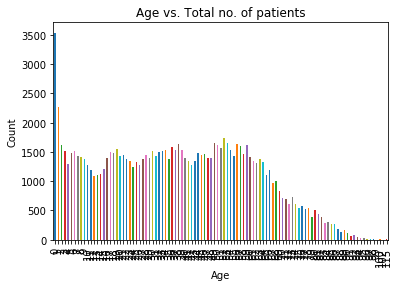

In [131]:
df.groupby('Age')['No-show'].count().plot(kind='bar').set_ylabel('Count')
df.groupby('Age')['No-show'].count()
df.groupby('Age')['No-show'].count().plot(kind='bar').set_title('Age vs. Total no. of patients');

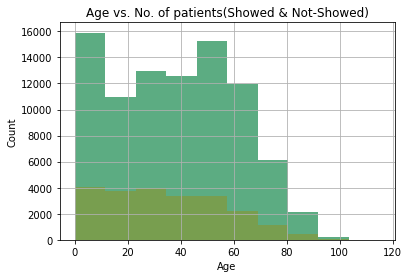

In [132]:
df.Age[showed].hist(alpha=0.5 , label='Showed').set_ylabel('Count')
df.Age[nshowed].hist(alpha=0.5 , label='Did not show').set_xlabel('Age')
df.Age[showed].hist(alpha=0.5 , label='Showed').set_title('Age vs. No. of patients(Showed & Not-Showed)');

As we can see from the plot: 
   for the ages up to 10 years about 21% of the patients did not show at the appointment.
   for the ages from 10 to 22 about 25% of the patients did not show at the appointment.
   for the ages from 22 to 36 about 23% of the patients did not show at the appointment.
   for the ages from 36 to 43 about 24% of the patients did not show at the appointment.
   for the ages from 43 to 57 about 19% of the patients did not show at the appointment.
   for the ages from 57 to 68 about 15% of the patients did not show at the appointment.
   for the ages from 68 to 80 about 14% of the patients did not show at the appointment.
   for the ages from 80 to 90 about 21% of the patients did not show at the appointment.
   for the ages from 90 to 115 about 27% of the patients did not show at the appointment.
   
So, patients in the age of 43 to 80 years, have low rate of not showing at the appointments, while patients with more than 90 years old have a high rate of not showing up, although there are not so many. 


### Does Sending SMS affect not showing up at the appointments?


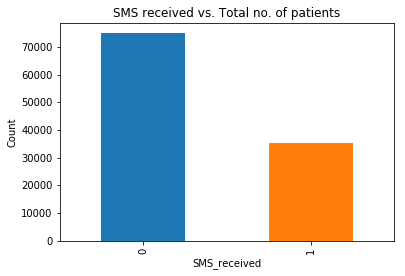

In [133]:
df.groupby('SMS_received')['No-show'].count().plot(kind='bar').set_ylabel('Count')
df.groupby('SMS_received')['No-show'].count();
df.groupby('SMS_received')['No-show'].count().plot(kind='bar').set_title('SMS received vs. Total no. of patients');

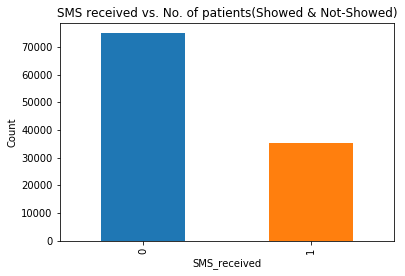

In [134]:
df.SMS_received[showed].hist(alpha=0.5 , label='Showed').set_ylabel('Count');
df.SMS_received[nshowed].hist(alpha=0.5 , label='Did not show');
df.groupby('SMS_received')['No-show'].count().plot(kind='bar').set_title('SMS received vs. No. of patients(Showed & Not-Showed)');

In [135]:
df.groupby('SMS_received')['No-show'].value_counts()

SMS_received  No-show
0             No         62389
              Yes        12503
1             No         25660
              Yes         9775
Name: No-show, dtype: int64

We can see from the plot, and result that:
    16% of patients who did not recieve an SMS, did not show at the appointment.
    28% of patients who recieved an SMS, did not show at the appointment.
    
We conclude that sending SMS does not improve showing up at the appointment.


### What is the relation between people with chronic diseases and not showing up at the appoinments?


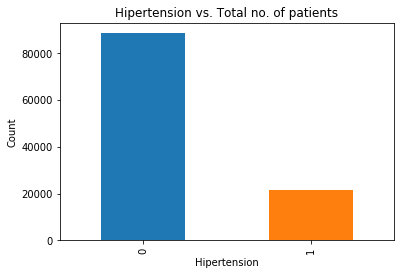

In [136]:
df.groupby('Hipertension')['No-show'].count().plot(kind='bar').set_ylabel('Count')
df.groupby('Hipertension')['No-show'].count();
df.groupby('Hipertension')['No-show'].count().plot(kind='bar').set_title('Hipertension vs. Total no. of patients');

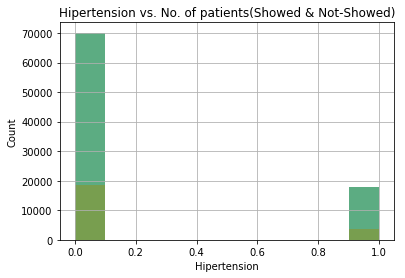

In [137]:
df.Hipertension[showed].hist(alpha=0.5 , label='Showed').set_ylabel('Count');
df.Hipertension[nshowed].hist(alpha=0.5 , label='Did not show').set_xlabel('Hipertension');
df.Hipertension[showed].hist(alpha=0.5 , label='Showed').set_title('Hipertension vs. No. of patients(Showed & Not-Showed)');

In [138]:
df.groupby('Hipertension')['No-show'].value_counts()

Hipertension  No-show
0             No         70081
              Yes        18530
1             No         17968
              Yes         3748
Name: No-show, dtype: int64

We see from the plot, and result that: 
    17% of patients with Hipertension did not show at the appointment.
    21% of patients with no Hipertension did not show at the appointment.
    
Thus, we can coclude that patients with Hipertension cares a little bit more about the appointments.

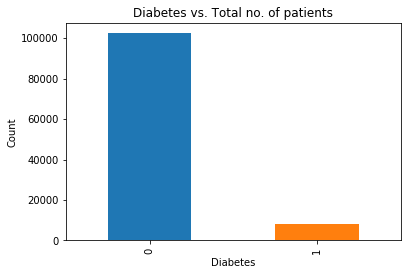

In [139]:
df.groupby('Diabetes')['No-show'].count().plot(kind='bar').set_ylabel('Count')
df.groupby('Diabetes')['No-show'].count();
df.groupby('Diabetes')['No-show'].count().plot(kind='bar').set_title('Diabetes vs. Total no. of patients');

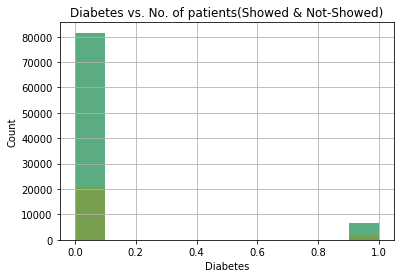

In [140]:
df.Diabetes[showed].hist(alpha=0.5 , label='Showed').set_ylabel('Count');
df.Diabetes[nshowed].hist(alpha=0.5 , label='Did not show').set_xlabel('Diabetes');
df.Diabetes[showed].hist(alpha=0.5 , label='Showed').set_title('Diabetes vs. No. of patients(Showed & Not-Showed)');

In [141]:
df.groupby('Diabetes')['No-show'].value_counts()

Diabetes  No-show
0         No         81571
          Yes        20856
1         No          6478
          Yes         1422
Name: No-show, dtype: int64

We see from the plot, and result that: 
    18% of patients with Diabetes did not show at the appointment.
    20% of patients with no Diabetes did not show at the appointment.
Thus, we can coclude that patients with Diabetes cares more about the appointments.

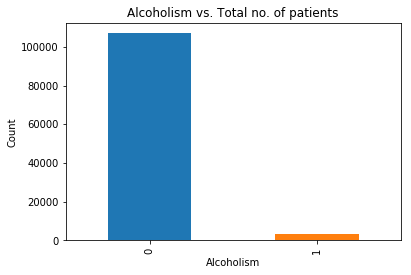

In [142]:
df.groupby('Alcoholism')['No-show'].count().plot(kind='bar').set_ylabel('Count')
df.groupby('Alcoholism')['No-show'].count();
df.groupby('Alcoholism')['No-show'].count().plot(kind='bar').set_title('Alcoholism vs. Total no. of patients');

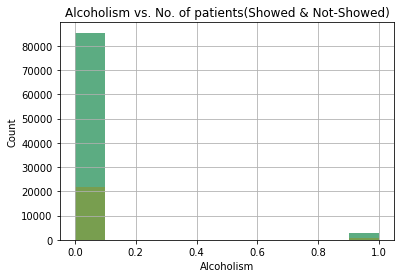

In [143]:
df.Alcoholism[showed].hist(alpha=0.5 , label='Showed').set_ylabel('Count');
df.Alcoholism[nshowed].hist(alpha=0.5 , label='Did not show').set_xlabel('Alcoholism');
df.Alcoholism[showed].hist(alpha=0.5 , label='Showed').set_title('Alcoholism vs. No. of patients(Showed & Not-Showed)');

In [144]:
df.groupby('Alcoholism')['No-show'].value_counts()

Alcoholism  No-show
0           No         85372
            Yes        21603
1           No          2677
            Yes          675
Name: No-show, dtype: int64

We see from the plot, and result that: 
    20% of patients with Alcoholism did not show at the appointment.
    20% of patients with no Alcoholism did not show at the appointment.
Thus, we can coclude that Alcoholism does not affect showing up at appointments.

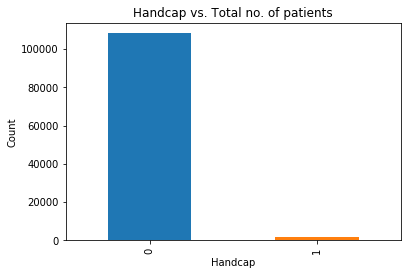

In [145]:
df.groupby('Handcap')['No-show'].count().plot(kind='bar').set_ylabel('Count')
df.groupby('Handcap')['No-show'].count();
df.groupby('Handcap')['No-show'].count().plot(kind='bar').set_title('Handcap vs. Total no. of patients');

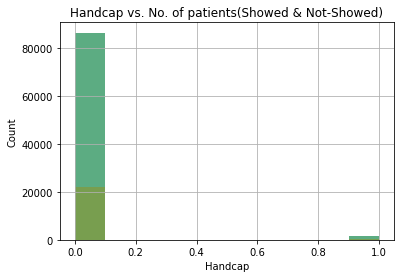

In [146]:
df.Handcap[showed].hist(alpha=0.5 , label='Showed').set_ylabel('Count');
df.Handcap[nshowed].hist(alpha=0.5 , label='Did not show').set_xlabel('Handcap');
df.Handcap[showed].hist(alpha=0.5 , label='Showed').set_title('Handcap vs. No. of patients(Showed & Not-Showed)');

In [147]:
df.groupby('Handcap')['No-show'].value_counts()

Handcap  No-show
0        No         86373
         Yes        21912
1        No          1676
         Yes          366
Name: No-show, dtype: int64

We see from the plot, and result that: 
    18% of patients with Handcap did not show at the appointment.
    20% of patients with no Handcap did not show at the appointment.
Thus, we conclude that Handcap patients cares more about the appointments.


### Does gender affect not showing up at the appointments?

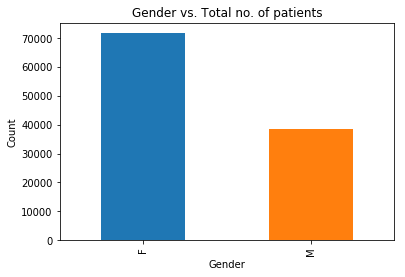

In [148]:
df.groupby('Gender')['No-show'].count().plot(kind='bar').set_ylabel('Count')
df.groupby('Gender')['No-show'].count();
df.groupby('Gender')['No-show'].count().plot(kind='bar').set_title('Gender vs. Total no. of patients');

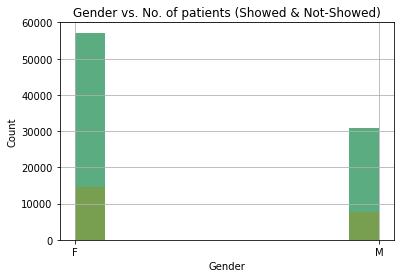

In [149]:
df.Gender[showed].hist(alpha=0.5 , label='Showed').set_ylabel('Count');
df.Gender[nshowed].hist(alpha=0.5 , label='Did not show').set_xlabel('Gender');
df.Gender[showed].hist(alpha=0.5 , label='Showed').set_title('Gender vs. No. of patients (Showed & Not-Showed)');

In [150]:
df.groupby('Gender')['No-show'].value_counts()

Gender  No-show
F       No         57162
        Yes        14568
M       No         30887
        Yes         7710
Name: No-show, dtype: int64

We see from the plot, and result that: 
    20% of male patients did not show at the appointment.
    20% of female patients did not show at the appointment.
Thus, we conclude that gender does not affects not showing up at the appointments.

<a id='conclusions'></a>
## Conclusions

This data set provides an enough number of data points, but it is limited on one hospital, one city, one period at 2016. Which means it is valid only for that hospital at that peiod of time. On the other hand, if we have the data for more than one hospital in one city on different periods of time, this will help analyzing the whole city.
In my opinion the missing value will not cause any difference since it is few points compared to the data set. We can use the results of this analysis in predicting if the patient will show at the appointments or not. 
The results of this analysis discussed above in the analysis part. 


## Submitting your Project 


In [127]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0